In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/stock_percentage_difference.csv')

In [4]:
# Filter DF to stock purchases
df_purchases = df[df['type'] == 'purchase']

In [5]:
df_purchases.columns

Index(['level_0', 'transaction_date', 'ticker', 'asset_description', 'type',
       'amount', 'representative', 'timestamp', 'state', 'party_x',
       'total_senate_years', 'total_house_years', 'total_years',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'start', 'day_30', 'day_30_stock_perc_diff',
       'day_60', 'day_60_stock_perc_diff', 'day_90', 'day_90_stock_perc_diff',
       'day_180', 'day_180_stock_perc_diff', 'sp_start', 'sp_30',
       'sp_30_sp_perc_diff', 'sp_60', 'sp_60_sp_perc_diff', 'sp_90',
       'sp_90_sp_perc_diff', 'sp_180', 'sp_180_sp_perc_diff'],
      dtype='object')

In [6]:
df_purchases['representative'].nunique()

95

In [7]:
# start of data
df_purchases['transaction_date'].min()

'2013-03-15'

In [8]:
# end of data
df_purchases['transaction_date'].max()

'2020-11-24'

In [9]:
df_purchases.head(1)

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,...,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
1,1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Nevada,Democratic,...,0.254,2447.330078,2797.800049,0.143,2955.449951,0.208,3083.76001,0.26,3319.469971,0.356


In [10]:
# how many transactions did 
df_transaction_num = df_purchases.groupby(['representative'])[['ticker']].count()

In [11]:
df_transaction_num.columns = ['transaction_number']

In [12]:
df_transaction_num

,transaction_number
representative,
"A. Mitchell Mcconnell, Jr.",11
Adam Kinzinger,13
Alan S. Lowenthal,108
"Angus S King, Jr.",5
Anthony E. Gonzalez,1
...,...
Virginia Foxx,28
W. Greg Steube,1
William Cassidy,54


In [13]:
con_stocks_avg_180_days = df_purchases.groupby(['representative'])[['day_180_stock_perc_diff']].mean()


In [14]:
# get the avg stock performance by representative after 180 days
con_stocks_avg_180_days = df_purchases.groupby(['representative'])[['day_180_stock_perc_diff']].mean()

# get the mean S&P 500 performance after 180 days from when a congressman purchased stock
sp_avg_180_days = df.groupby(['representative'])[['sp_180_sp_perc_diff']].mean()

In [15]:
# look at the top stock returns for congressmen and congresswomen
con_stocks_avg_180_days.sort_values(by='day_180_stock_perc_diff',ascending=False)

,day_180_stock_perc_diff
representative,
Austin Scott,3.096250
Brian Mast,0.773429
David Trone,0.654000
Doug Lamborn,0.629000
Michael Garcia,0.520333
...,...
Tom Rice,-0.120500
James E. Banks,-0.155077
Michael Patrick Guest,-0.227000


# Top Performer Analysis
Massie sold Tesla stock only, but had a sizable return. His total invesment was less than  50k. Austin Scott bought Bloom Energy and FuelCell Energy, Ballard Power systems, Exxon, GE, Plug Power with lots of small investments. Kim Schrier sold lots of Apple stock in March 2020 worth ~1+ million dollars. Schneider only sold Trupanion worth approximately 1 $million.

In [16]:
# merge performance of two dataframes
con_sp_180d_avg_merge = con_stocks_avg_180_days.merge(sp_avg_180_days, left_index=True, right_index=True)

In [17]:
# merge transaction numbers with stock performance
stock_perform = con_sp_180d_avg_merge.merge(df_transaction_num, left_index=True, right_index=True)

In [18]:
# create new column for how much their investments made above the s&p500 average
stock_perform['performance_diff_sp500'] = stock_perform['day_180_stock_perc_diff'] - stock_perform['sp_180_sp_perc_diff']

In [19]:
stock_perform.columns

Index(['day_180_stock_perc_diff', 'sp_180_sp_perc_diff', 'transaction_number',
       'performance_diff_sp500'],
      dtype='object')

In [20]:
stock_perform.columns = ['day_180_avg_stock_perc_diff', 'day_180_avg_sp_perc_diff', 'stock_transactions',
       'performance_vs_avg_180days']

In [21]:
# look at top and bottom performers
stock_perform.sort_values(by='performance_vs_avg_180days',ascending=False)


,day_180_avg_stock_perc_diff,day_180_avg_sp_perc_diff,stock_transactions,performance_vs_avg_180days
representative,,,,
Austin Scott,3.096250,0.191000,4,2.905250
Brian Mast,0.773429,0.112526,7,0.660902
David Trone,0.654000,0.142333,1,0.511667
James French Hill,0.465000,-0.043000,1,0.508000
Doug Lamborn,0.629000,0.193214,6,0.435786
...,...,...,...,...
Michael Patrick Guest,-0.227000,0.016000,2,-0.243000
Zoe Lofgren,0.173667,0.427910,6,-0.254244
"Neal Patrick MD, Facs Dunn",-0.247250,0.027125,4,-0.274375


We should probably drop the senators who only made one transaction.

In [22]:
# measuring stock performance at 30 days, 60 days 90 days
df_purchases['day_30_stock_perc_diff'].mean()

0.025702607331895774

In [23]:
df_purchases['sp_30_sp_perc_diff'].mean()

0.02669594197216237

In [24]:
df_purchases.columns

Index(['level_0', 'transaction_date', 'ticker', 'asset_description', 'type',
       'amount', 'representative', 'timestamp', 'state', 'party_x',
       'total_senate_years', 'total_house_years', 'total_years',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'start', 'day_30', 'day_30_stock_perc_diff',
       'day_60', 'day_60_stock_perc_diff', 'day_90', 'day_90_stock_perc_diff',
       'day_180', 'day_180_stock_perc_diff', 'sp_start', 'sp_30',
       'sp_30_sp_perc_diff', 'sp_60', 'sp_60_sp_perc_diff', 'sp_90',
       'sp_90_sp_perc_diff', 'sp_180', 'sp_180_sp_perc_diff'],
      dtype='object')

In [25]:
# clean dataframe for analysis
# drop congressmen with less than 3 transactions.
# our high performer and low performers only 
stock_perform_sorted = stock_perform[stock_perform['stock_transactions']>=3].sort_values(by='performance_vs_avg_180days',ascending=False)

In [26]:
# save congressmen sorted by best investments over the s&p500 (average) at the same time

stock_perform_sorted = stock_perform[stock_perform['stock_transactions']>=5].sort_values(by='performance_vs_avg_180days',ascending=False)

In [27]:
stock_perform_sorted['day_180_avg_sp_perc_diff'].mean()

0.14858232594517998

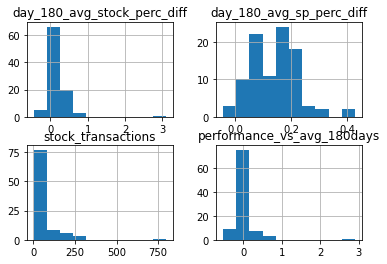

In [28]:
# distirbutions of stock performance
stock_perform.hist();

Our stock transactions have a right skew, and the 180 days average for the S&P 500 index (value of the biggest companies) has a bimodal distribution that is approximately normal in shape.

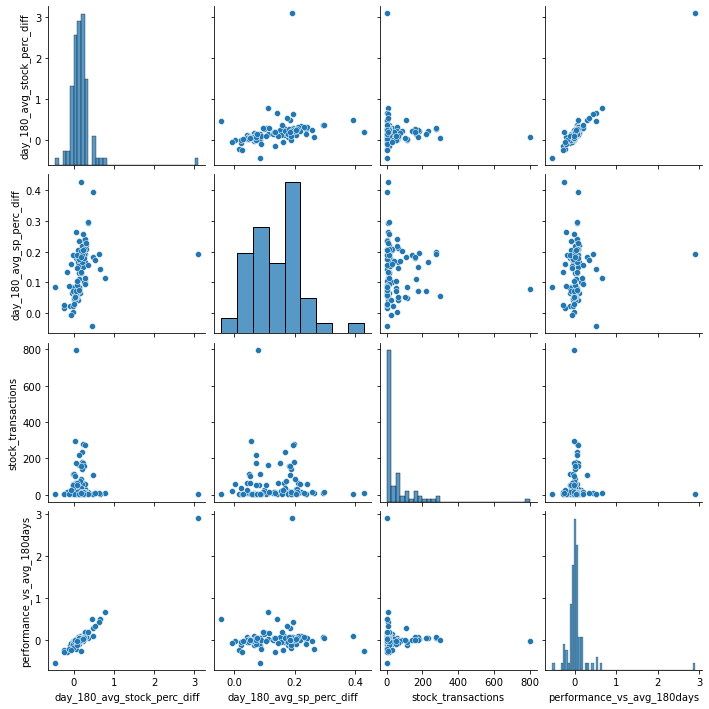

In [29]:
# correlations
sns.pairplot(stock_perform);

There doesn't appear to be a strong correlation between our variables that are not congressional stocks or the S&P 500.

In [30]:
stock_perform_sorted.index[:5]

Index(['Brian Mast', 'Doug Lamborn', 'Michael Garcia', 'Alan S. Lowenthal',
       'Roger W. Marshall'],
      dtype='object', name='representative')

In [31]:
df_purchases.head(1)

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,...,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
1,1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Nevada,Democratic,...,0.254,2447.330078,2797.800049,0.143,2955.449951,0.208,3083.76001,0.26,3319.469971,0.356


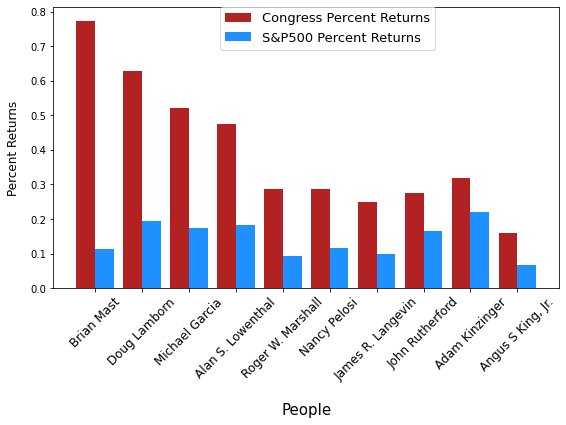

In [32]:
# visualizations

# top 10 congress performers

# get grouped returns by person (fill with columns as needed)
values = stock_perform_sorted[:10]

#getting names of top 5 reps
barchart_names = values.index[:10]
labels = [col for col in barchart_names]
#getting corresponding names 
lst_one = [item for item in values.day_180_avg_stock_perc_diff[:10].values]
lst_two =  [item for item in values.day_180_avg_sp_perc_diff[:10].values]
#make labels and bar locations
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars
# plot both columns next to eachother 
fig, ax = plt.subplots(figsize = (8, 6))
rects1 = ax.bar(x - width/2, lst_one, width, label='Congress Percent Returns', color = 'firebrick')
rects2 = ax.bar(x + width/2, lst_two, width, label='S&P500 Percent Returns ', color = 'dodgerblue')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent Returns', fontsize = 12, labelpad = 10)
ax.set_xlabel('People', fontsize = 15, labelpad = 20)
# setting up the graph
#ax.set_ylim([.05,.3])
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12, rotation=45)
ax.legend(loc = (0.33, .85), fontsize = 13, facecolor = 'white')
ax.set_facecolor('white')
fig.tight_layout()
plt.show();

In [33]:
# view of top performers
stock_perform_sorted[:10]

,day_180_avg_stock_perc_diff,day_180_avg_sp_perc_diff,stock_transactions,performance_vs_avg_180days
representative,,,,
Brian Mast,0.773429,0.112526,7,0.660902
Doug Lamborn,0.629000,0.193214,6,0.435786
Michael Garcia,0.520333,0.173091,9,0.347242
Alan S. Lowenthal,0.476148,0.183083,108,0.293066
Roger W. Marshall,0.286933,0.093958,15,0.192975
Nancy Pelosi,0.286929,0.115407,14,0.171521
James R. Langevin,0.250643,0.099538,28,0.151104
John Rutherford,0.274933,0.166000,15,0.108933
Adam Kinzinger,0.319846,0.221000,13,0.098846


In [34]:
values = stock_perform_sorted[64:74]
values

,day_180_avg_stock_perc_diff,day_180_avg_sp_perc_diff,stock_transactions,performance_vs_avg_180days
representative,,,,
Michael K. Simpson,0.050500,0.264000,6,-0.213500
Virginia Foxx,-0.068214,0.159733,28,-0.227948
Zoe Lofgren,0.173667,0.427910,6,-0.254244
James E. Banks,-0.155077,0.134600,13,-0.289677


The middle 10 congressmen only have a sleight improvment over the market performance.

In [35]:
# Congress' Average performance over the market
stock_perform_sorted['performance_vs_avg_180days'].sum()

1.4323626425092755

In [36]:
# 
stock_perform_sorted['day_180_avg_stock_perc_diff'].sum

<bound method Series.sum of representative
Brian Mast             0.773429
Doug Lamborn           0.629000
Michael Garcia         0.520333
Alan S. Lowenthal      0.476148
Roger W. Marshall      0.286933
                         ...   
Carol Devine Miller    0.055737
Michael K. Simpson     0.050500
Virginia Foxx         -0.068214
Zoe Lofgren            0.173667
James E. Banks        -0.155077
Name: day_180_avg_stock_perc_diff, Length: 68, dtype: float64>

In [37]:
# convert date to datetime
df['transaction_date'] = df['transaction_date'].astype('datetime64')

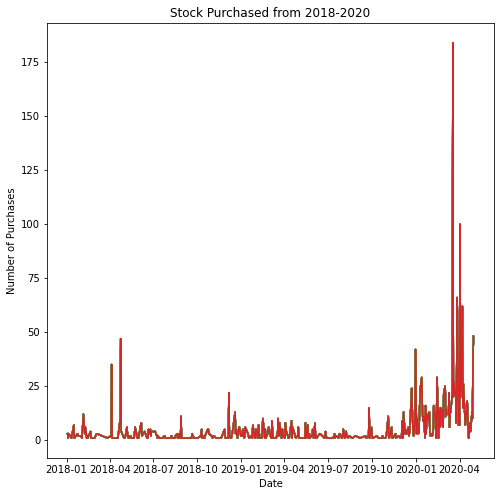

In [38]:
plt.figure(figsize = (8,8))
plt.plot(df[(df['type'] == 'purchase') & (df['transaction_date'] > pd.to_datetime('2018-01-01'))& (df['transaction_date'] < pd.to_datetime('2020-05-01'))].groupby('transaction_date').count().index,
         df[(df['type'] == 'purchase') & (df['transaction_date'] > pd.to_datetime('2018-01-01'))& (df['transaction_date'] < pd.to_datetime('2020-05-01'))].groupby('transaction_date').count())
plt.title('Stock Purchased from 2018-2020')
plt.ylabel('Number of Purchases')
plt.xlabel('Date');

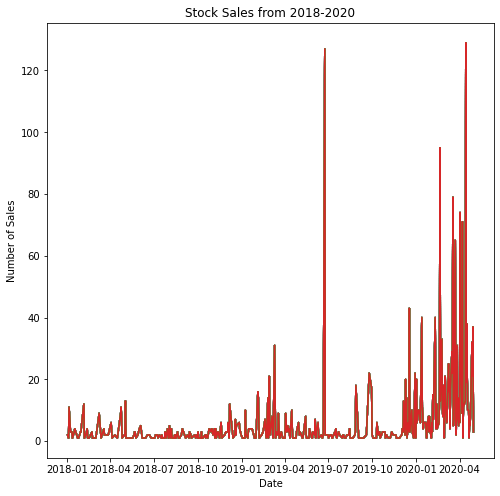

In [39]:
plt.figure(figsize = (8,8))
plt.plot(df[(df['type'] != 'purchase') & (df['transaction_date'] > pd.to_datetime('2018-01-01'))& (df['transaction_date'] < pd.to_datetime('2020-05-01'))].groupby('transaction_date').count().index,
         df[(df['type'] != 'purchase') & (df['transaction_date'] > pd.to_datetime('2018-01-01'))& (df['transaction_date'] < pd.to_datetime('2020-05-01'))].groupby('transaction_date').count() )
plt.title('Stock Sales from 2018-2020')
plt.ylabel('Number of Sales')
plt.xlabel('Date');

In [40]:
stock_perform['stock_transactions'].sort_values(ascending=False)[:20]

representative
David A Perdue , Jr      797
Sheldon Whitehouse       296
Gilbert Cisneros         278
Greg Gianforte           274
Mark Green               232
Pat Roberts              218
Dean Phillips            179
Josh Gottheimer          176
Shelley M Capito         175
Donald Sternoff Beyer    162
Thomas R Carper          160
Ron L Wyden              157
Susie Lee                142
Donna Shalala            112
John Hoeven              111
Alan S. Lowenthal        108
Susan M Collins          101
Kelly Loeffler            88
Kevin Hern                77
James M Inhofe            64
Name: stock_transactions, dtype: int64

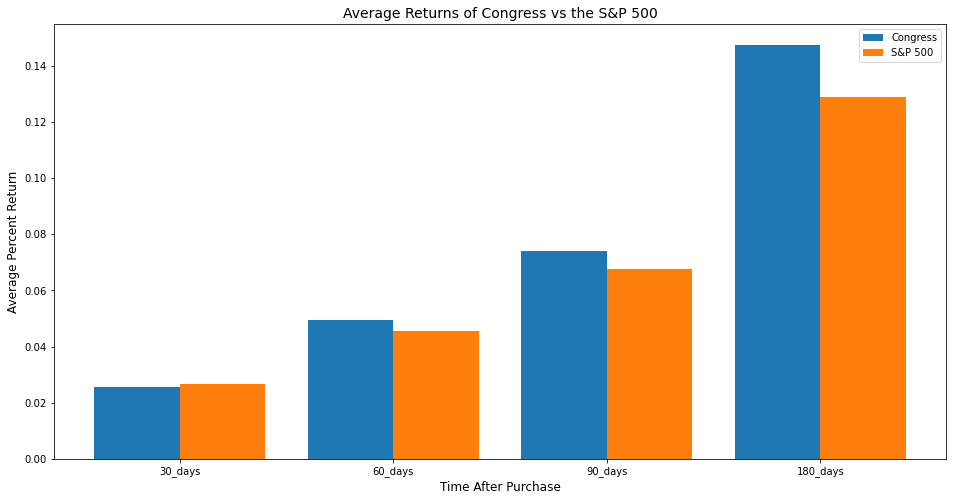

In [41]:
purchase = df.loc[df['type'] == 'purchase']
purchase_stocks = purchase.describe().loc['mean', ['day_30_stock_perc_diff', 'day_60_stock_perc_diff',
                                 'day_90_stock_perc_diff', 'day_180_stock_perc_diff']]
purchase_sp = purchase.describe().loc['mean', ['sp_30_sp_perc_diff', 'sp_60_sp_perc_diff',
                                 'sp_90_sp_perc_diff', 'sp_180_sp_perc_diff']]
plt.figure(figsize = (16, 8))
plt.title('Average Returns of Congress vs the S&P 500', fontsize = 14)
plt.bar([.8, 1.8, 2.8, 3.8], purchase_stocks, width = .4, label = 'Congress')
plt.bar([1.2, 2.2, 3.2, 4.2], purchase_sp, width = .4, label = 'S&P 500')
plt.xticks(ticks = [1, 2,3,4], labels = ['30_days', '60_days', '90_days', '180_days'])
plt.ylabel('Average Percent Return', fontsize = 12)
plt.xlabel('Time After Purchase', fontsize = 12)
plt.legend();

Congressmen did not beat the S&P 500 performance over the short-term (30 days), but did beat the S&P 500 average over a span of six months (180 days) by around 4.88%.  

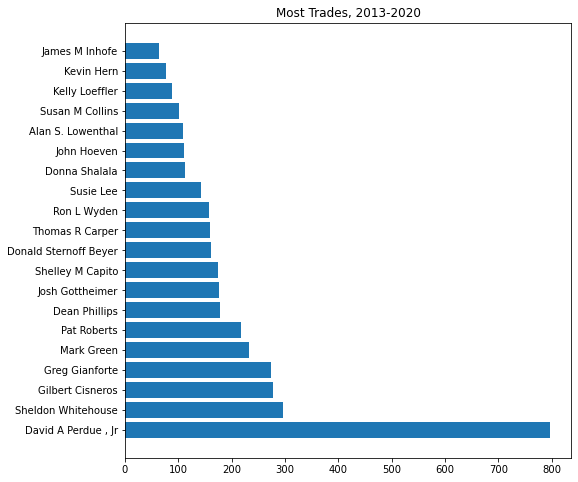

In [42]:
plt.figure(figsize = (8,8))
values = stock_perform['stock_transactions'].sort_values(ascending=False)[:20]

#getting names of middle 10 reps
barchart_names = values.index[:20]

# setting up graph
height = values
labels = [col for col in barchart_names]
y_pos = np.arange(len(labels))

#create horizontal bars
plt.barh(y_pos, height)

# create names on teh x_axis
plt.yticks(y_pos, labels)
plt.title('Most Trades, 2013-2020')
plt.show()

David Perdue sold ~2.5x more stocks than the next highest Congressmen. This is a very rapid rate.  His total number of stock transactions is over 1600.

Data range:  2013-03-15 through 2020-11-24
